# Importing Basic Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

# Reading Data

In [2]:
reviews = pd.read_csv(r"C:\Users\DELL\Desktop\Python Data\NLP Project\Ulta Skincare Reviews.csv")
reviews.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4148 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


#### There are a total of 10 columns with 4150 rows
#### Out of 10 columns 8 are text or objective data type and 2 are of integer data type

# Data Exploration

In [4]:
unique_dates = pd.DataFrame(reviews.Review_Date.value_counts())
unique_dates.head(5)

,Review_Date
2 years ago,916
1 year ago,844
5 years ago,638
4 years ago,412
3 years ago,279


In [5]:
unique_products = pd.DataFrame(reviews.Product.value_counts())
unique_products

,Product
Daily Superfoliant,1500
Daily Microfoliant,1500
Hydro Masque Exfoliant,800
Multi-Vitamin Thermafoliant,350


In [6]:
unique_brands = pd.DataFrame(reviews.Brand.value_counts())
unique_brands

,Brand
Dermalogica,4150


# Data Cleaning

## Missing Values Treatment

In [7]:
reviews.isna().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [8]:
## There are 2 texts and a location missing, which we can fill with unknown

In [9]:
reviews.fillna('Unknown', inplace = True)

In [10]:
reviews.isna().sum() # There are no missing values present in the dataset now

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

## Text Cleaning

In [11]:
data=pd.DataFrame(reviews.Review_Text)

data.head(10)

,Review_Text
0,Love using this on my face while in the shower...
1,Even better than the daily microfoliant. I'm o...
2,Enjoy this product so much ! I look forward to...
3,I've never tried anything like this before and...
4,This exfoliates very nicely and gives a very s...
5,"Love that you can use it wet and dry, you can ..."
6,Absolutely love
7,I truly like the multivitamin thermafoliant pr...
8,Definitely love it! My skin face feels better ...
9,Excelent


In [12]:
data.info() # no missing values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  4150 non-null   object
dtypes: object(1)
memory usage: 32.5+ KB


In [13]:
data.iloc[2,0]

'Enjoy this product so much ! I look forward to using it - really feels great.'

### Step 1 :- Lower case

In [14]:
data.Review_Text=data.Review_Text.str.lower() # makes the text into lowercase

In [15]:
data.iloc[2,0]

'enjoy this product so much ! i look forward to using it - really feels great.'

### Remove url

In [16]:
data.Review_Text = data.Review_Text.str.replace(r'http\S+|www.\S+','',case=False)

In [17]:
data.iloc[2,0]

'enjoy this product so much ! i look forward to using it - really feels great.'

### Punctuation Mark

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def remove_punctuation(abc):
    text_nopunt="".join([c  
                         for c in abc  
                         if c not in string.punctuation])
    return text_nopunt

In [20]:
data.Review_Text=data.Review_Text.apply(lambda x : remove_punctuation(x)) 

In [21]:
data.iloc[2,0]

'enjoy this product so much  i look forward to using it  really feels great'

### Removing Numbers

In [22]:
data['Review_Text'] = data['Review_Text'].str.replace('\d+','') 

### Removing Stop Words

In [23]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
data['Review_Text'] = data['Review_Text'].apply(lambda x: ' '.join([abc  
                                                      for abc in x.split() 
                                                      if abc not in (stop)]))

In [25]:
data.iloc[2,0]

'enjoy product much look forward using really feels great'

## Common Words

In [26]:
import re # replace of words
words = set(nltk.corpus.words.words()) # corpus & set array 
words

{'graywacke',
 'inoccupation',
 'chagan',
 'pensileness',
 'folkmooter',
 'permissive',
 'unheired',
 'airy',
 'alehouse',
 'Gobia',
 'intraverbal',
 'archae',
 'cauline',
 'observedly',
 'comblessness',
 'sloped',
 'regrede',
 'egressor',
 'proboxing',
 'gesten',
 'illachrymableness',
 'ropelaying',
 'telodendron',
 'Isospondyli',
 'unfrenchified',
 'uniphonous',
 'instrumentative',
 'Piricularia',
 'unstoically',
 'cincholoipon',
 'plounce',
 'unspacious',
 'wept',
 'idolize',
 'metaleptic',
 'overall',
 'immergent',
 'latiseptal',
 'Balkan',
 'pruinous',
 'Nannette',
 'Rolandic',
 'undespaired',
 'abject',
 'basketball',
 'disapparel',
 'eutrophy',
 'misnavigation',
 'spareable',
 'particularization',
 'shovelbill',
 'eccentricity',
 'attractionally',
 'Gleditsia',
 'isocellular',
 'unrefining',
 'fibrinuria',
 'ribroast',
 'Johannisberger',
 'poblacion',
 'safekeeping',
 'impregnator',
 'counterorator',
 'procedure',
 'thoracolysis',
 'Varronia',
 'wheresomever',
 'circuiter',
 'pa

In [27]:
def clean_text_round2(text):
    # Get rid of some additional punctuation and non-sensical text that was missed the first time around.
    text =  re.sub('skin|product|face|li', "", text) #remove skin
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad & aA
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return text

In [28]:
data = pd.DataFrame(data.Review_Text.apply(lambda x: clean_text_round2(x)))
data.head()

,Review_Text
0,love shower scrub nicely
1,even better daily much smoother
2,enjoy much look forward really great
3,never tried anything love apply get shot warm ...
4,nicely smooth irritation reaction highly buy


## Converting Emojis to readable Texts

In [29]:
#!pip install demoji

In [30]:
#!pip install emot

In [31]:
import demoji
 
demoji.download_codes()

import emot
import re
#from emot.emo_unicode import UNICODE_EMO, EMOTICONS

from emot.emo_unicode import UNICODE_EMOJI
from emot.emo_unicode import EMOTICONS_EMO

In [32]:
def convert_emojis(text):
    for abc in UNICODE_EMOJI:
        text = text.replace(abc, "_".join(UNICODE_EMOJI[abc].replace(",","").replace(":","").split()))
    return text

In [33]:
data.Review_Text=data.Review_Text.apply(lambda x : convert_emojis(x))  

In [34]:
data.head()

,Review_Text
0,love shower scrub nicely
1,even better daily much smoother
2,enjoy much look forward really great
3,never tried anything love apply get shot warm ...
4,nicely smooth irritation reaction highly buy


## Lemitization

In [35]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
word_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [36]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(text)]

In [37]:
data.Review_Text = data.Review_Text.apply(lambda x :' '.join(lemmatize_text(x)))

In [38]:
data.iloc[2,0]

'enjoy much look forward really great'

### Stip Extra Whitespace

In [39]:
data.iloc[2,0]

'enjoy much look forward really great'

In [40]:
data['Review_Text'] = (data['Review_Text'].astype("str").str.strip())
data.iloc[2,0]

'enjoy much look forward really great'

## Term Document Matrix

In [41]:
# Creating document term matrix
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # BACK UP
data_cv = cv.fit_transform(data.Review_Text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # TERM = KEY WORDS

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm

,0,1,2,3,4,5,6,7,8,9,...,4140,4141,4142,4143,4144,4145,4146,4147,4148,4149
aback,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abrasive,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
absolute,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuck,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yummy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
tdm.reset_index(inplace=True)
tdm.tail()

,index,0,1,2,3,4,5,6,7,8,...,4140,4141,4142,4143,4144,4145,4146,4147,4148,4149
2517,yuck,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2518,yummy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2519,zero,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2520,zone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2521,zoo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,4141,4142,4143,4144,4145,4146,4147,4148,4149,freq
0,aback,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,47
2,abrasive,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,56
3,absolute,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
4,absolutely,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,160


In [44]:
tdm1=tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(15)

,Word,freq
2386,use,2637
1264,love,1324
1237,leave,1154
2019,smooth,1016
979,great,934
2032,soft,868
2266,time,830
827,feel,774
675,dry,735
1728,really,685


### Visualizing most frequent words

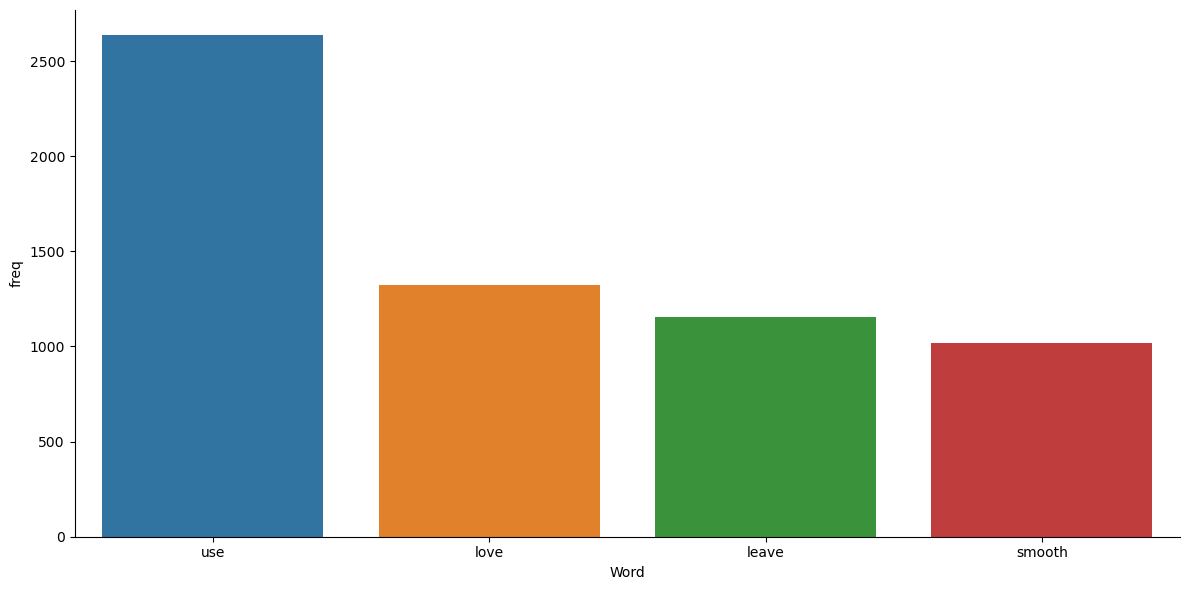

In [45]:
import seaborn as sns
w = tdm1[tdm1['freq'] >=1000] 
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

## Word Cloud

In [46]:
text = " ".join(review for review in data.Review_Text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 407713 words in the combination of all review.


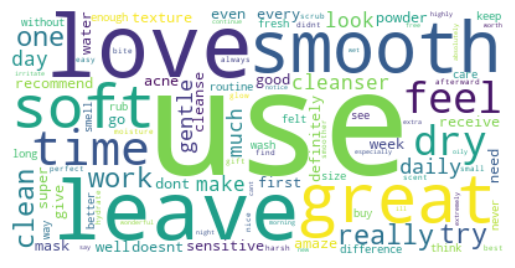

In [47]:
stopwords = set(STOPWORDS)
# Generate a word cloud image
cloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="white",
                      collocations=False,
                      max_words=100).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

# Sentiment Analysis

In [48]:
data.head()

,Review_Text
0,love shower scrub nicely
1,even better daily much smoother
2,enjoy much look forward really great
3,never try anything love apply get shoot warm g...
4,nicely smooth irritation reaction highly buy


In [49]:
data = data.drop_duplicates('Review_Text') 
data

,Review_Text
0,love shower scrub nicely
1,even better daily much smoother
2,enjoy much look forward really great
3,never try anything love apply get shoot warm g...
4,nicely smooth irritation reaction highly buy
...,...
4145,much better scrub
4146,depend condition ill use anywhere week clear d...
4147,better ago
4148,useless know use daily would gentle didnt see ...


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3573 entries, 0 to 4149
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  3573 non-null   object
dtypes: object(1)
memory usage: 55.8+ KB


In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [52]:
sentiment = SentimentIntensityAnalyzer()

In [53]:
score_pos = []
score_neg = []
score_com = []

for i in range(0, data.shape[0]):
    score = sentiment.polarity_scores(data.iloc[i][0]) ## this [1] is for the 2nd column (review columns)
    # below 2 lines to extract the positive sentiment.
    score1 = score['pos']
    score_pos.append(score1)
    # below 2 lines to extract the negetive sentiment.
    score2 = score['neg']
    score_neg.append(score2)
    # below 2 lines to extract the compound sentiment.
    score3 = score['compound']
    score_com.append(score3)

In [54]:
data['score_pos'] = score_pos
data['score_neg'] = score_neg
data['score_com'] = score_com

In [55]:
data.head()

,Review_Text,score_pos,score_neg,score_com
0,love shower scrub nicely,0.780,0.000,0.7964
1,even better daily much smoother,0.420,0.000,0.4404
2,enjoy much look forward really great,0.655,0.000,0.8221
3,never try anything love apply get shoot warm g...,0.363,0.249,0.3883
4,nicely smooth irritation reaction highly buy,0.284,0.324,-0.1027


In [56]:
Predicted = []

for i in data['score_com']:
    if i >= 0.00:
        Predicted.append('Positive')
    else:
        Predicted.append('Negetive')
        
        
data['Predicted'] = Predicted

In [57]:
data.head()

,Review_Text,score_pos,score_neg,score_com,Predicted
0,love shower scrub nicely,0.780,0.000,0.7964,Positive
1,even better daily much smoother,0.420,0.000,0.4404,Positive
2,enjoy much look forward really great,0.655,0.000,0.8221,Positive
3,never try anything love apply get shoot warm g...,0.363,0.249,0.3883,Positive
4,nicely smooth irritation reaction highly buy,0.284,0.324,-0.1027,Negetive


In [58]:
data.Predicted.value_counts()

Positive    3277
Negetive     296
Name: Predicted, dtype: int64

<AxesSubplot:>

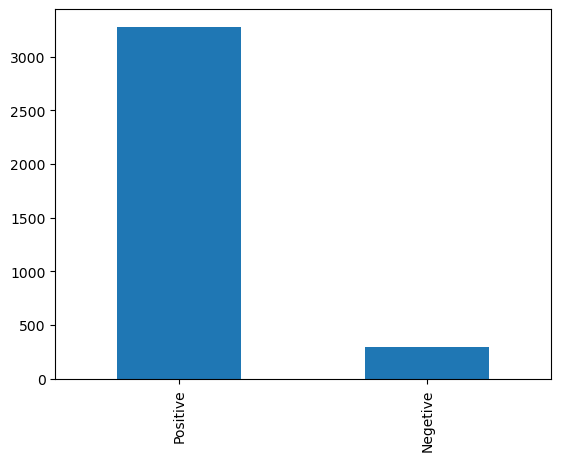

In [59]:
data.Predicted.value_counts().plot.bar()

In [60]:
X = data.drop('Predicted', axis = 1)
Y = data[['Predicted']]

In [61]:
# from imblearn.under_sampling import RandomUnderSampler

# ros = RandomUnderSampler(random_state = 30)
# X_Undersample, y_Undersample = ros.fit_resample(X,Y)

In [62]:
# print('Orignal Target Variable value count:\n', data.Predicted.value_counts())
# print('Under sampling Target Variable value count:\n', y_Undersample.value_counts())

In [63]:
# data = data.dropna()

In [64]:
# data.info()

In [65]:
# data.isnull().sum()

In [66]:
# Final_combined = pd.concat([X_Undersample, y_Undersample],axis=1)
# Final_combined.head()

In [67]:
combined = pd.concat([X,Y],axis = 1)
combined.head()

,Review_Text,score_pos,score_neg,score_com,Predicted
0,love shower scrub nicely,0.780,0.000,0.7964,Positive
1,even better daily much smoother,0.420,0.000,0.4404,Positive
2,enjoy much look forward really great,0.655,0.000,0.8221,Positive
3,never try anything love apply get shoot warm g...,0.363,0.249,0.3883,Positive
4,nicely smooth irritation reaction highly buy,0.284,0.324,-0.1027,Negetive


In [68]:
combined.Predicted.value_counts()

Positive    3277
Negetive     296
Name: Predicted, dtype: int64

In [69]:
# Final_combined.Predicted.value_counts()

In [70]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3573 entries, 0 to 4149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Review_Text  3573 non-null   object 
 1   score_pos    3573 non-null   float64
 2   score_neg    3573 non-null   float64
 3   score_com    3573 non-null   float64
 4   Predicted    3573 non-null   object 
dtypes: float64(3), object(2)
memory usage: 167.5+ KB


In [71]:
# Final_combined.info()

<AxesSubplot:>

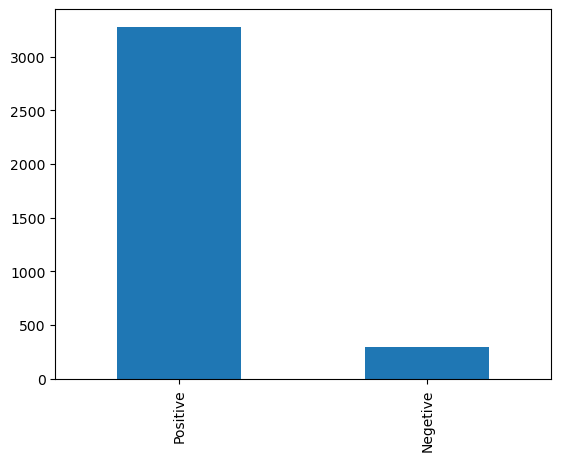

In [72]:
combined.Predicted.value_counts().plot.bar()

In [73]:
# Final_combined.Predicted.value_counts().plot.bar()

In [74]:
negetive_predicted = combined[combined.Predicted == 'Negetive']
negetive_predicted.head()

,Review_Text,score_pos,score_neg,score_com,Predicted
4,nicely smooth irritation reaction highly buy,0.284,0.324,-0.1027,Negetive
12,use shower around twice weekly usually whilst ...,0.175,0.209,-0.1027,Negetive
27,new dead debris remove,0.000,0.589,-0.6486,Negetive
60,worry go rough sensitive complete opposite mea...,0.000,0.266,-0.4404,Negetive
73,use allergic turn red next day get extremely,0.000,0.239,-0.2960,Negetive


In [75]:
# negetive_predicted = Final_combined[Final_combined.Predicted == 'Negetive']
# negetive_predicted.head()

In [76]:
# neutral_predicted = combined[combined.Predicted == 'Neutral']
# neutral_predicted.head()

In [77]:
# neutral_predicted = Final_combined[Final_combined.Predicted == 'Neutral']
# neutral_predicted.head()

In [78]:
positive_predicted = combined[combined.Predicted == 'Positive']
positive_predicted.head()

,Review_Text,score_pos,score_neg,score_com,Predicted
0,love shower scrub nicely,0.780,0.000,0.7964,Positive
1,even better daily much smoother,0.420,0.000,0.4404,Positive
2,enjoy much look forward really great,0.655,0.000,0.8221,Positive
3,never try anything love apply get shoot warm g...,0.363,0.249,0.3883,Positive
5,love use wet dry control abrasive leave soft,0.368,0.105,0.6124,Positive


In [79]:
# positive_predicted = Final_combined[Final_combined.Predicted == 'Positive']
# positive_predicted.head()

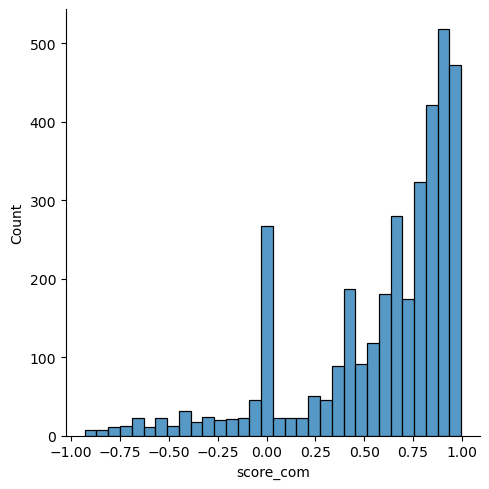

In [80]:
sns.displot(data=data['score_com'])

In [81]:
# from nltk.corpus import stopwords

# import matplotlib.pyplot as plt

# cloud = WordCloud(max_words=50, stopwords=stopwords.words("english")).generate(str(neutral_predicted['Review_Text']))
# plt.figure(figsize=(10,10))
# plt.imshow(cloud)

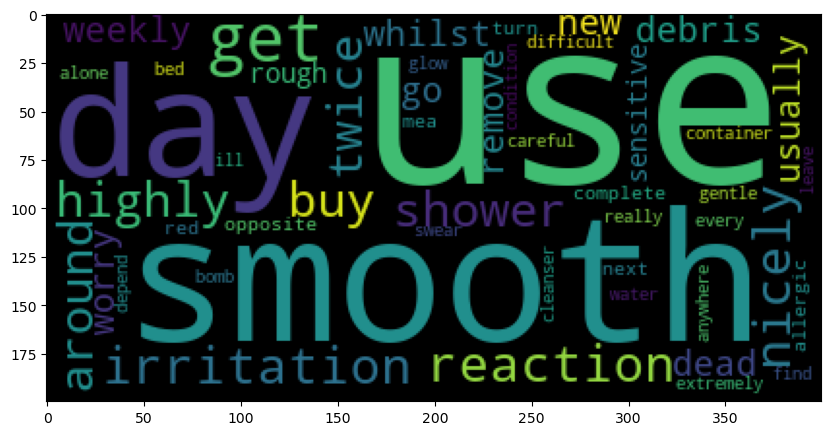

In [82]:
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

cloud = WordCloud(max_words=50, stopwords=stopwords.words("english")).generate(str(negetive_predicted['Review_Text']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

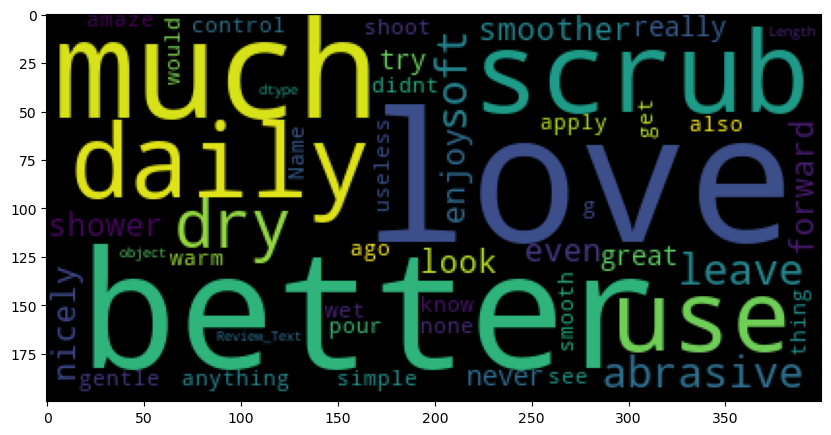

In [83]:
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

cloud = WordCloud(max_words=50, stopwords=stopwords.words("english")).generate(str(positive_predicted['Review_Text']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [84]:
predicted = combined["Predicted"]
predicted.head()

0    Positive
1    Positive
2    Positive
3    Positive
4    Negetive
Name: Predicted, dtype: object

In [85]:
reviews = pd.concat([reviews,predicted],axis = 1)
reviews.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Predicted
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,Positive
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,Positive
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,Positive
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,Positive
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,Negetive


In [86]:
positive_product = reviews.loc[reviews['Predicted'] == 'Positive']
positive_product

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Predicted
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,Positive
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,Positive
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,Positive
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,Positive
5,Seriously nice scrub!,"Love that you can use it wet and dry, you can ...",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,Positive
...,...,...,...,...,...,...,...,...,...,...,...
4144,Facials to go,Simple pouring none abrasive,Yes,7 years ago,Corvallis Oregon,0,1,Daily Microfoliant,Dermalogica,3/27/23,Positive
4145,I would buy this product again,Much better product than a scrub.,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant,Dermalogica,3/27/23,Positive
4147,One of my favorite skincare products of all time.,My skin looks better now than 10 years ago.,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant,Dermalogica,3/27/23,Positive
4148,Ehhh...,This product was useless for me. I should've k...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant,Dermalogica,3/27/23,Positive


In [87]:
positive_review_products = pd.DataFrame(positive_product.Product.value_counts())
positive_review_products

,Product
Daily Microfoliant,1328
Daily Superfoliant,1317
Hydro Masque Exfoliant,320
Multi-Vitamin Thermafoliant,312


In [90]:
negative_product = reviews.loc[reviews['Predicted'] == 'Negetive']
negative_product

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Predicted
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,Negetive
12,Favorite Dermalogica product!,"I use this in the shower around twice weekly, ...",No,3 months ago,Undisclosed,3,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,Negetive
27,Polish your skin,Skin feels like new after using this product -...,No,4 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,Negetive
60,I was worried it was,I was worried it was going to be too rough on ...,Yes,8 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,Negetive
73,Burns off skin,Used once and skin had allergic reactions(?) T...,Yes,10 months ago,Undisclosed,2,3,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,Negetive
...,...,...,...,...,...,...,...,...,...,...,...
4063,I would buy and suggest this product!!,With my cleanser or alone.,Yes,6 years ago,Margate nj,0,0,Daily Microfoliant,Dermalogica,3/27/23,Negetive
4073,Would not recommend,Found product difficult to use. Had to be care...,Yes,6 years ago,Hampstead Maryland,1,2,Daily Microfoliant,Dermalogica,3/27/23,Negetive
4084,Buy this!,Swear by this. Use every day for a gentle exfo...,Yes,6 years ago,New Jersey,0,0,Daily Microfoliant,Dermalogica,3/27/23,Negetive
4112,"So far, I really like it!",I use this product before bed and leaves my sk...,Yes,7 years ago,"Green Bay, WI",0,0,Daily Microfoliant,Dermalogica,3/27/23,Negetive


In [91]:
negative_review_products = pd.DataFrame(negative_product.Product.value_counts())
negative_review_products

,Product
Daily Superfoliant,120
Daily Microfoliant,114
Hydro Masque Exfoliant,34
Multi-Vitamin Thermafoliant,28


# Finish